# Lab 09 - Data Mining - Annette Bazan

### Introduction:
- What is data mining? **Data mining is the process of digging into the data and look for valuable infromation, data patterns, and the relationship between various variables.**
- The most popular Data mining techniques:
1. Descriptive analysis
2. Building models (classification, regression, KNN)
3. Data visualization
4. Statistical analysis 

### Data Mining Questions:
1. How many movies are there per each genre?
2. What are the top 10 genres with highest number of movies?
3. What are the movies that have more than one (3) genres?
4. What are the first 25 top-rating movies that have 100 or more reviews?
5. What is the realtionship between the movie's genre and the user's gender?

### Importing Libraries

In [2]:
# General Libraries
import pandas as pd
import numpy as np
import math

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing warnings
import warnings 
warnings.filterwarnings('ignore')

### Loading the Datasets:

In [3]:
# Loading the datasets
df1 = pd.read_csv('movie.csv')
df2 = pd.read_csv('ratings.csv')
df3 = pd.read_csv('user.csv')

In [4]:
#copies
movie = df1.copy()
ratings = df2.copy()
user = df3.copy()

In [7]:
# Data attributes
movie.shape

(1680, 21)

In [8]:
movie.size

35280

In [9]:
movie.ndim

2

In [11]:
movie.dtypes

movie id         int64
movie title     object
release date    object
Action           int64
Adventure        int64
Animation        int64
Childrens        int64
Comedy           int64
Crime            int64
Documentary      int64
Drama            int64
Fantasy          int64
Film-Noir        int64
Horror           int64
Musical          int64
Mystery          int64
Romance          int64
Sci-Fi           int64
Thriller         int64
War              int64
Western          int64
dtype: object

In [10]:
movie.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

**Observations 1:**
- no missing values
- just three columns are not genres: movie id, movie title, and release data
- movie has 2 dimensons
- movie size is 35280
- movie dataset shape is (1680, 21)

In [30]:
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [12]:
ratings.shape

(100000, 4)

In [13]:
ratings.size

400000

In [14]:
ratings.ndim

2

In [15]:
ratings.dtypes

user id      int64
movie id     int64
rating       int64
timestamp    int64
dtype: object

In [16]:
ratings.columns

Index(['user id', 'movie id', 'rating', 'timestamp'], dtype='object')

**Observations 2:**
- ratings shape is (100000, 4)
- the size is 400000
- the dimensionality is 2
- and the dtypes are integers and object
- the columns are user id, movie id, rating, and timestamp

In [17]:
user.shape

(943, 5)

In [18]:
user.size

4715

In [20]:
user.ndim

2

In [21]:
user.dtypes

user id        int64
age            int64
gender        object
occupation    object
zip code      object
dtype: object

In [22]:
user.columns

Index(['user id', 'age', 'gender', 'occupation', 'zip code'], dtype='object')

**Observations 3:**
- user dataset shape is (943, 5)
- user dimensionality is 2
- user dtypes have object and integer
- user size is 4715
- the columns for user is user id, age, gender, ovvupation and zip code

In [24]:
# More information
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1680 non-null   int64 
 1   movie title   1680 non-null   object
 2   release date  1680 non-null   object
 3   Action        1680 non-null   int64 
 4   Adventure     1680 non-null   int64 
 5   Animation     1680 non-null   int64 
 6   Childrens     1680 non-null   int64 
 7   Comedy        1680 non-null   int64 
 8   Crime         1680 non-null   int64 
 9   Documentary   1680 non-null   int64 
 10  Drama         1680 non-null   int64 
 11  Fantasy       1680 non-null   int64 
 12  Film-Noir     1680 non-null   int64 
 13  Horror        1680 non-null   int64 
 14  Musical       1680 non-null   int64 
 15  Mystery       1680 non-null   int64 
 16  Romance       1680 non-null   int64 
 17  Sci-Fi        1680 non-null   int64 
 18  Thriller      1680 non-null   int64 
 19  War   

In [27]:
# Statistical summary
movie.describe().T

,count,mean,std,min,25%,50%,75%,max
movie id,1680.0,841.525595,485.609591,1.0,421.75,841.5,1261.25,1682.0
Action,1680.0,0.149405,0.356593,0.0,0.00,0.0,0.00,1.0
Adventure,1680.0,0.080357,0.271926,0.0,0.00,0.0,0.00,1.0
Animation,1680.0,0.025000,0.156171,0.0,0.00,0.0,0.00,1.0
Childrens,1680.0,0.072619,0.259587,0.0,0.00,0.0,0.00,1.0
Comedy,1680.0,0.300595,0.458653,0.0,0.00,0.0,1.00,1.0
Crime,1680.0,0.064881,0.246389,0.0,0.00,0.0,0.00,1.0
Documentary,1680.0,0.029762,0.169980,0.0,0.00,0.0,0.00,1.0
Drama,1680.0,0.431548,0.495440,0.0,0.00,0.0,1.00,1.0
Fantasy,1680.0,0.013095,0.113717,0.0,0.00,0.0,0.00,1.0


In [29]:
# Summary of the object variables
movie.describe(include = 'object')

,movie title,release date
count,1680,1680
unique,1657,239
top,That Darn Cat!,1-Jan-95
freq,3,215


In [32]:
# Examining the mising values
movie.isnull().sum()

movie id        0
movie title     0
release date    0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

**Observations 4:**
- it has no missing values
- The top movie title is That Darn Cat!
- Release data for the top movie is Jan 1, 1995
- Has 21 columns
- There are 1657 unique movie title values

In [33]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [34]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [35]:
ratings.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

**Observations 5:**
- There is only integer types
- has 100000 entries
- no missing values
- for user id the max is 945
- for rating the min is 1 the max is 5

In [36]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [37]:
user.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [38]:
user.describe(include = 'object')

,gender,occupation,zip code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [39]:
user.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

**Observaations 6:**
- min is 7 years old
- oldest is 73 years old
- the top occupation is a student
- the top gender is male.
- There are 21 unique values in occupations

### Visualization

In [40]:
# Examining the unique categories
ratings['rating'].value_counts()

rating
4    34174
3    27145
5    21201
2    11370
1     6110
Name: count, dtype: int64

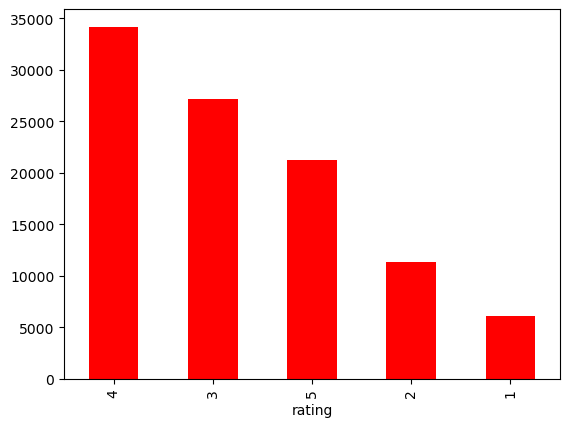

In [44]:
# Plotting the outputs
ratings['rating'].value_counts().plot(kind = 'bar', color ='r');

In [48]:
# Unique categories
user['gender'].value_counts()

gender
M    670
F    273
Name: count, dtype: int64

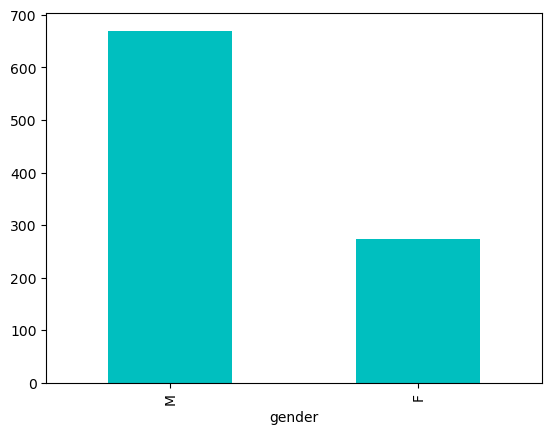

In [51]:
# Plotting the outputs
user['gender'].value_counts().plot(kind = 'bar', color ='c');

**Observations 7:**
- There are more male users than female users
- male users are 670
- female users are 273
- The ratings for the number 1 is 6110
- For the fifth ratings the number in total is 21201

### Answering the Mining Questions

In [52]:
# 1. How many movies are there per each genre?
movie.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [53]:
movie[['Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western']].sum()

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [54]:
# Another way to get the numbers of movies per each genre is using an indexer(loc and iloc)
movie.loc[:, 'Action': 'Western'].sum()

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [64]:
# 2.What are the top 10 genres with highest number of movies listed in desceding order?
movie.loc[:, 'Action': 'Western'].sum().sort_values(ascending = False)

Drama          725
Comedy         505
Action         251
Thriller       251
Romance        247
Adventure      135
Childrens      122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
dtype: int64

In [65]:
# Only the top 10
movie.loc[:, 'Action': 'Western'].sum().sort_values(ascending = False).head(10)

Drama        725
Comedy       505
Action       251
Thriller     251
Romance      247
Adventure    135
Childrens    122
Crime        109
Sci-Fi       101
Horror        92
dtype: int64

In [66]:
# 3. What are the movies that have more than one (3) genres?
# For this question, first we need to create a new dataset and name it genre_movie
# We will have two variables from the movie dataset
# 'movie id', and 'movie title'

genre_movie = movie[['movie id', 'movie title']]
genre_movie.head()

,movie id,movie title
0,1,Toy Story
1,2,GoldenEye
2,3,Four Rooms
3,4,Get Shorty
4,5,Copycat


In [69]:
# Step 2 for answering this question, we need to create a new column and 
# name it 'num of genres' and add this new column to the genre_movie 
genre_movie['num of genres'] = movie.loc[:, 'Action': 'Western'].sum(axis = 1)
genre_movie.head()

,movie id,movie title,num of genres
0,1,Toy Story,3
1,2,GoldenEye,3
2,3,Four Rooms,1
3,4,Get Shorty,3
4,5,Copycat,3


In [70]:
# Unique catefories in the num of genres column
genre_movie['num of genres'].value_counts()

num of genres
1    831
2    569
3    215
4     51
5     11
6      3
Name: count, dtype: int64

In [73]:
# Movies with more than one genres
genre_movie[genre_movie['num of genres'] > 1]

,movie id,movie title,num of genres
0,1,Toy Story,3
1,2,GoldenEye,3
3,4,Get Shorty,3
4,5,Copycat,3
6,7,Twelve Monkeys,2
...,...,...,...
1666,1669,MURDER and murder,3
1667,1670,Tainted,2
1670,1673,Mirage,2
1676,1679,B. Monkey,2


In [74]:
# Movies with more than 3 genres
genre_movie[genre_movie['num of genres'] > 3]

,movie id,movie title,num of genres
16,17,From Dusk Till Dawn,5
20,21,Muppet Treasure Island,5
28,29,Batman Forever,4
49,50,Star Wars,5
50,51,Legends of the Fall,4
...,...,...,...
1108,1110,Tank Girl,4
1136,1138,Best Men,4
1217,1219,"Goofy Movie, A",4
1291,1293,Star Kid,4


In [91]:
# Movies with more than five genres
genre_count = genre_movie[genre_movie['num of genres'] > 3].sort_values(by='num of genres',ascending=False)
genre_count.head()

,movie id,movie title,num of genres
424,426,"Transformers: The Movie, The",6
558,560,"Kid in King Arthur's Court, A",6
171,172,"Empire Strikes Back, The",6
16,17,From Dusk Till Dawn,5
991,993,Hercules,5


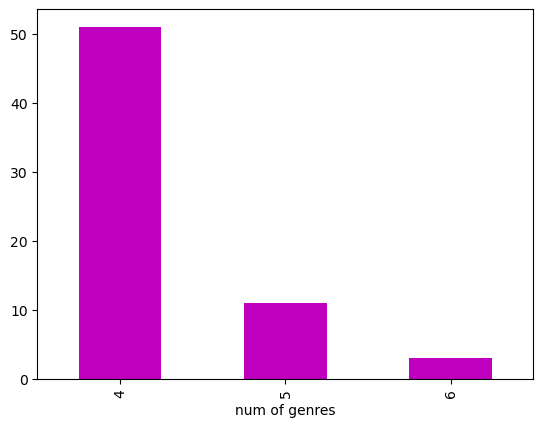

In [92]:
# plotting 
genre_count['num of genres'].value_counts().plot(kind='bar', color='m');

In [ ]:
# 4. What are the first 25 top-rating movies that have 100 or more reviews?

In [99]:
ratings = df2.copy()

In [108]:
movie_stats = ratings.groupby('movieId').agg(
    rating=('rating', 'mean'),
    num_reviews=('rating', 'count')
).reset_index()

KeyError: 'movieId'

In [105]:
popular_movies=movie_stats[movie_stats['num_reviews']>= 100]

NameError: name 'movie_stats' is not defined

In [94]:
top_25_movies = popular_movies.sort_values(by='rating', ascending=False).head(25)

NameError: name 'popular_movies' is not defined

In [ ]:
top_25_movies[['title', 'rating', 'num_reviews']]

In [ ]:
# 5.What is the realtionship between the movie's genre and the user's gender?